# CSC413 Lab 3: Multi-Layer Perceptrons with MedMNIST

MedMNIST's PneumoniaMNIST data set. We will now transition fully to
using PyTorch for our labs going forward.

By the end of this lab, you will be able to:

1. Build and train an MLP using PyTorch
2. Define the following performance metrics for evaluating machine learning models: true positive, true negative, false positive, false negative, precision, recall, ROC curve, and AUC.
3. Interpret the confusion matrix.
4. Explain the advantages of the AUC metrics over accuracy metrics.
5. Perform grid search to find hyperparameters.

Acknowledgements:

- The MedMNIST data is from https://medmnist.com/
- This assignment is written by Mahdi Haghifam, Sonya Allin, Lisa Zhang, Mike Pawliuk and Rutwa Engineer

Please work in groups of 1-2 during the lab.

## Submission

If you are working with a partner, start by creating a group on Markus. If you are working alone,
click "Working Alone".

Submit the ipynb file `lab03.ipynb` on Markus
**containing all your solutions to the Graded Task**s.
Your notebook file must contain your code **and outputs** where applicable,
including printed lines and images.
Your TA will not run your code for the purpose of grading.

For this lab, you should submit the following:

- Part 2. Your expression that computes the number of trainable parameters in the MLPModel (1 point)
- Part 2. Your implementation of `accuracy`. (1 point)
- Part 2. Your implementation of `train_model`. (2 points)
- Part 3. Your implementation of `precision` and `recall`. (2 points)
- Part 3. Your interpretation of the confusion matrix for `m_once` (1 point)
- Part 4. Your completion of the grid search, along with the output (2 point)
- Part 4. Your description of why a model with high AUC may still perform poorly for some groups (1 point)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Google Colab Setup

We will be using the `medmnist` data set, which is available as a Python package.
Recall that on Google Colab, we use "!" to run shell commands.

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=3929338c5430fa6a5eff016d1d45931b287a52dbe49bdb0a6fd55b734edffa03
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


## Part 1. Data

We will use the MedMNIST data set, which is described here: [https://medmnist.com/](https://medmnist.com/).
We will use the PneumoniaMNIST images, which are greyscale chest X-ray images that has been resized to 28x28.
The task is to predict, given one of these X-ray images, whether the patient has pneumonia or not---a binary
classification task.
We chose this dataset both because it is lightweight, and because it allows us to discuss the sensitive nature of
biomedical images.

Let's begin by printing some information about the PneumoniaMNIST  data set:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import medmnist
from medmnist import PneumoniaMNIST

medmnist.INFO['pneumoniamnist']

{'python_class': 'PneumoniaMNIST',
 'description': 'The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/pneumoniamnist.npz?download=1',
 'MD5': '28209eda62fecd6e6a2d98b1501bb15f',
 'url_64': 'https://zenodo.org/records/10519652/files/pneumoniamnist_64.npz?download=1',
 'MD5_64': '8f4eceb4ccffa70c672198ea285246c6',
 'url_128': 'https://zenodo.org/records/10519652/files/pneumoniamnist_128.npz?download=1',
 'MD5_128': '05b46931834c231683c68f40c47b2971',
 'url_224': 'https://zenodo.org/records/10519652/files/pneumoniamnist_224.npz?download=1',
 'MD5_224': 'd6a3c71de1b94

**Task**: The dataset providers already split the data into training, validation, and test sets.
How many samples are there in the training, validation, and test sets?

In [ ]:
# 4708 in training, 524 in validation, and 624 in test.

Let's visually inspect the first element of the training data:

100%|██████████| 4170669/4170669 [00:01<00:00, 3792130.76it/s]


[[ 92 108 117 111 101  90  70  49  28  60  83 119 156 186 211 204 192 203
  204 166 115  90  53   0   0   5   8   6]
 [129 138 141 132 120 111 100  89  97 110 105 117 144 173 195 181 194 193
  178 142 110  92  57  11   6   4   2   3]
 [141 146 148 143 134 128 126 126 140 156 143 137 144 162 180 165 159 166
  155 135 126 110  79  55   8   0   0   0]
 [120 126 135 139 139 138 143 150 135 172 178 170 160 162 176 165 163 175
  161 140 132 110  86  83  46  28  19  27]
 [105 114 126 135 143 154 165 174 147 179 185 182 172 169 178 166 177 180
  158 141 144 135 121 125 110  89  77  81]
 [101 113 125 133 148 168 181 183 180 180 163 166 173 175 179 164 172 169
  158 159 178 183 168 154 137 123 113 114]
 [ 83 107 126 136 155 178 181 167 167 152 131 150 173 177 181 168 185 181
  177 171 170 177 169 146 142 136 130 127]
 [ 62  97 127 144 166 187 175 147 120 114 112 149 177 177 184 179 183 178
  172 146 122 143 172 170 161 160 152 141]
 [ 45  90 136 150 191 177 158 139 131 118 119 143 170 184 192 20

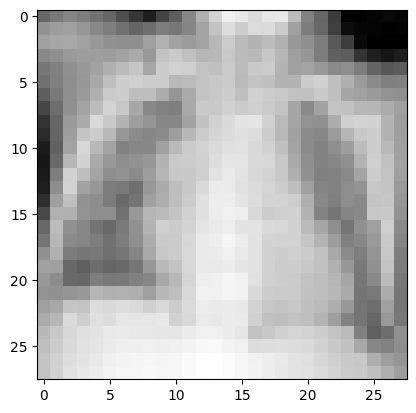

In [ ]:
train_data_imgs = PneumoniaMNIST(split='train', download=True)

for img, target in train_data_imgs:
    plt.imshow(img, cmap='gray')
    print(np.array(img)) # img is a numpy array of shape 28x28 , with integer values between 0-255
    print(target)        # the target
    break

**Task**: Based on the code above, what is the type of the data structure `train_data`?

In [ ]:
# Numpy array of shades per pixel as a number from 0 (black) to 255 (white).

**Task**: The code below plots 5 images from each class: normal and pneumonia.
Do you notice qualitative differences between these two sets of images?
It is always important to qualitatively assess your data prior to training, so that you
can develop intuition as to what features may or may not be important for your model.
Understanding your data also helps to estimate how challenging the classification problem
may be and identify incorrect implementations (e.g., a surprisingly high model accuracy could
indicate issues with training set leakage into the test set).

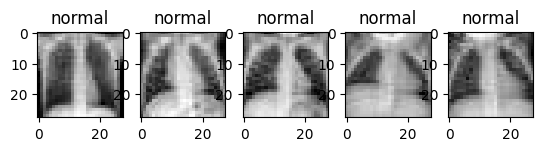

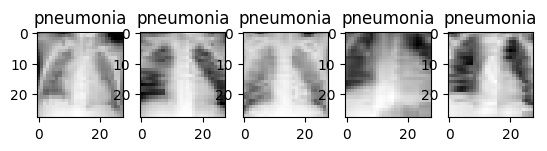

In [ ]:
# normal images
plt.figure()
n = 0
for img, target in train_data_imgs:
    if int(target) == 0:
      plt.subplot(1, 5, n+1)
      plt.title("normal")
      plt.imshow(img, cmap='gray')
      n += 1
    if n >= 5:
      break
# pneumonia images
plt.figure()
n = 0
for img, target in train_data_imgs:
    if int(target) == 1:
      plt.subplot(1, 5, n+1)
      plt.title("pneumonia")
      plt.imshow(img, cmap='gray')
      n += 1
    if n >= 5:
      break

In [ ]:
# The penumonia patients seem to tend to have larger patches of lighter shade blobs
# in the chest cavity, while normal usually shows a clear chest cavity with the rib cage completely visible.

PyTorch makes it easy to apply pre-processing transformations to the data, for example to normalize
the data prior to using for training. We will use the standard preprocessing functions to
*transform the images into tensors* for PyTorch to be able to use. This transformation also
changes the values to be floating-point numbers between 0 and 1.

In [ ]:
import torchvision.transforms as transforms # contains a collection of transformations

train_data = PneumoniaMNIST(split='train', download=True, transform=transforms.ToTensor())
val_data = PneumoniaMNIST(split='val', download=True, transform=transforms.ToTensor())
test_data = PneumoniaMNIST(split='test', download=True, transform=transforms.ToTensor())

for img, target in train_data:
    print(img)    # img is a PyTorch tensor fo shape 1x28x28
    print(target) # the target
    break

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
tensor([[[0.3608, 0.4235, 0.4588, 0.4353, 0.3961, 0.3529, 0.2745, 0.1922,
          0.1098, 0.2353, 0.3255, 0.4667, 0.6118, 0.7294, 0.8275, 0.8000,
          0.7529, 0.7961, 0.8000, 0.6510, 0.4510, 0.3529, 0.2078, 0.0000,
          0.0000, 0.0196, 0.0314, 0.0235],
         [0.5059, 0.5412, 0.5529, 0.5176, 0.4706, 0.4353, 0.3922, 0.3490,
          0.3804, 0.4314, 0.4118, 0.4588, 0.5647, 0.6784, 0.7647, 0.7098,
          0.7608, 0.7569, 0.6980, 0.5569, 0.4314, 0.3608, 0.2235, 0.0431,
          0.0235, 0.0157, 0.0078, 0.0118],
         [0.5529, 0.5725, 0.5804, 0.5608, 0.5255, 0.5020, 0.4941, 0.4941,
          0.5490, 0.6118, 0.5608, 0.5373, 0.5647, 0.6353, 0.7059, 0.6471,
          0.6235, 0.6510, 0.6078, 0.5294, 0.4941, 0.4314, 0.3098, 0.2157,
          0.0314, 0.0000, 0.0000, 0

**Task**: How many X-ray images are in the training set *with* pneumonia? What about *without* pneumonia?
What about the validation/test sets?
What does your answer say about the data balance?

In [ ]:
num_pos = 0
num_neg = 0
for img, target in train_data:
    if target == 1:
      num_pos+= 1
    else:
      num_neg+=1
print('Training:', num_pos, num_neg)
num_pos = 0
num_neg = 0
for img, target in val_data:
    if target == 1:
      num_pos+= 1
    else:
      num_neg+=1
print('Validation:', num_pos, num_neg)
num_pos = 0
num_neg = 0
for img, target in test_data:
    if target == 1:
      num_pos+= 1
    else:
      num_neg+=1
print('Testing:', num_pos, num_neg)
# In order of positive cases to negative cases:
# Training: 3494 1214
# Validation: 389 135
# Testing: 390 234
# The distribution seems skewed towards positive cases, so the algorithm will
# be more used to seeing positive cases than negative. This imbalances the
# data and can create a bias in the predictions. The skew is about 75%:25%.

Training: 3494 1214
Validation: 389 135
Testing: 390 234


## Part 2. Model and Training

We will build our own PyTorch model, which will be a subclass of `nn.Module`.
This subclass provides the important methods that we used in the training loop
in lab 1, including the methods that allow us to compute the forward pass
by calling the model object, and other methods used under the hood to compute
the backward pass.

Our model will be a three-layer MLP with the following architecture:
ACTUALTODO---the model architecture may change!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLPModel(nn.Module):
    """A three-layer MLP model for binary classification"""
    def __init__(self, input_dim=28*28, num_hidden=100):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.fc3 = nn.Linear(num_hidden, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

**Graded Task**: How many trainable parameters are in this model?
Express your answer in terms of `input_dim` and `num_hidden`.

In [ ]:
# There are three layers of linear computations, one from a size of:
# input_dim -> num_hidden -> num_hidden -> 1
# The first layer will require a matrix of size input_dim*num_hidden, the second
# with num_hidden**2, and the last with size num_hidden, as well as biases of
# size num_hidden, num_hidden, and 1 respectively, for a total of:
# (input_dim+num_hidden+3)*num_hidden+1
# parameters that can be trained.

In order to assess model performance, we will begin by
implementing the `accuracy` function, which computes the accuracy
of the model across a dataset.

**Graded Task**: Complete the `accuracy` function. Keep in mind
that this function will be slightly different from the `accuracy`
function in lab 1, since we are working on a binary classification
problem and prediction here is a single logit value (rather than
a vector).

In [ ]:
def accuracy(model, dataset):
    """
    Compute the accuracy of `model` over the `dataset`.
    We will take the **most probable class**
    as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """

    correct, total = 0, 0
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = (z>0)

        correct += int(torch.sum(t == y))
        total   += t.shape[0]
    return correct / total

Because we are working with binary classification, we will be using a
different implementation of the cross-entropy loss function, implemented
via PyTorch in a class called `BCEWithLogitsLoss` (short for
Binary Cross Entropy with Logits loss).

In [ ]:
criterion = nn.BCEWithLogitsLoss()

This loss function takes a predicted logit (pre-softmax activation)
and the ground-truth label.
The use of pre-softmax logits rather than prediction probabilities is
due to numerical stability reasons.

In [ ]:
print(criterion(torch.tensor([2.5]),  # predicted
                torch.tensor([1.])))  # actual

print(criterion(torch.tensor([-2.5]), # predicted
                torch.tensor([1.])))  # actual

tensor(0.0789)
tensor(2.5789)


**Task**: Explain why the second printed
value above is *larger* than the first. In other words,
why does it make sense that we think of the second prediction
(logit of z=-2.5) as "worse" than the first (logit of z=2.5)?

In [ ]:
# The first prediction under the softmax will give us a predicted probability <0.5
# of the label being 1, so the best prediction in the Bayesian sense is 0, which
# is wrong. The second is larger than 0, so its softmax will be >0.5, and so will
# be closer to predicting 1, as desired.

**Graded Task**: Complete the following code to be used for training.

50 Loss: 0.551666796207428 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
100 Loss: 0.37030544877052307 Train Acc: 0.8621495327102804 Val Acc: 0.8625954198473282
150 Loss: 0.33801838755607605 Train Acc: 0.877017841971113 Val Acc: 0.8702290076335878
200 Loss: 0.2612820863723755 Train Acc: 0.8997451146983857 Val Acc: 0.8931297709923665
250 Loss: 0.24739544093608856 Train Acc: 0.9103653355989805 Val Acc: 0.9179389312977099
300 Loss: 0.21387343108654022 Train Acc: 0.9078164825828378 Val Acc: 0.9083969465648855
350 Loss: 0.17042894661426544 Train Acc: 0.9197111299915038 Val Acc: 0.9198473282442748
400 Loss: 0.18287289142608643 Train Acc: 0.9301189464740867 Val Acc: 0.9389312977099237
450 Loss: 0.2475418597459793 Train Acc: 0.9318181818181818 Val Acc: 0.9465648854961832


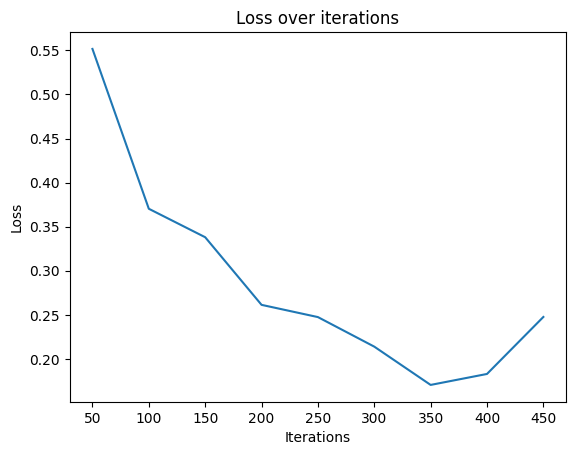

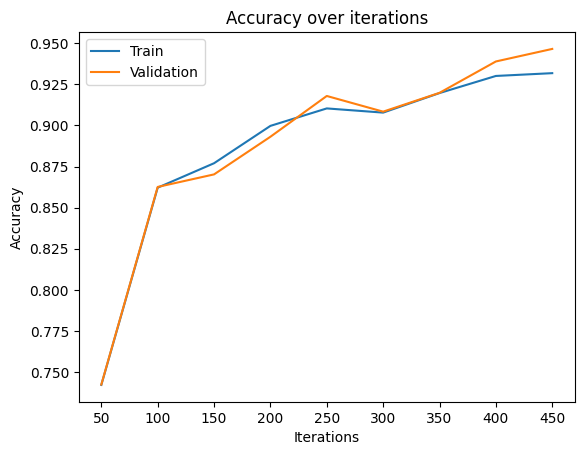

In [ ]:
def train_model(model,                # an instance of MLPModel
                train_data,           # training data
                val_data,             # validation data
                learning_rate=0.1,
                batch_size=100,
                num_epochs=10,
                plot_every=50,        # how often (in # iterations) to track metrics
                plot=True):           # whether to plot the training curve
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               shuffle=True) # reshuffle minibatches every epoch
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # these lists will be used to track the training progress
    # and to plot the training curve
    iters, train_loss, train_acc, val_acc = [], [], [], []
    iter_count = 0 # count the number of iterations that has passed

    try:
        for e in range(num_epochs):
            for i, (images, labels) in enumerate(train_loader):
                z = model(images.reshape(-1,784))

                loss = criterion(z, labels.float())

                loss.backward() # propagate the gradients
                optimizer.step() # update the parameters
                optimizer.zero_grad() # clean up accumualted gradients

                iter_count += 1
                if iter_count % plot_every == 0:
                    iters.append(iter_count)
                    ta = accuracy(model, train_data)
                    va = accuracy(model, val_data)
                    train_loss.append(float(loss))
                    train_acc.append(ta)
                    val_acc.append(va)
                    print(iter_count, "Loss:", float(loss), "Train Acc:", ta, "Val Acc:", va)
    finally:
        # This try/finally block is to display the training curve
        # even if training is interrupted
        if plot:
            plt.figure()
            plt.plot(iters[:len(train_loss)], train_loss)
            plt.title("Loss over iterations")
            plt.xlabel("Iterations")
            plt.ylabel("Loss")

            plt.figure()
            plt.plot(iters[:len(train_acc)], train_acc)
            plt.plot(iters[:len(val_acc)], val_acc)
            plt.title("Accuracy over iterations")
            plt.xlabel("Iterations")
            plt.ylabel("Accuracy")
            plt.legend(["Train", "Validation"])

# Please include the output of this cell for grading
model = MLPModel()
train_model(model, train_data, val_data)

**Task**: Suppose that a model has a validation accuracy of 74% for this
binary classification task. Why would this model be considered a very bad model?
Your answer should illustrate why accuracy may not be an excellent tool to use.

In [ ]:
# The ratio between positive and negative examples in the data is about 75%, so
# this is arguably very bad since this accuracy would be matched by a predicter
# that only predicts constant positive, which clearly does not reflect any of
# the information or nuance in the information presented by the actual examples.

## Part 3. Performance Metrics

We often use accuracy as a go-to metric when evaluating the performance of
a classification model. However, the accuracy measure weighs all errors equally.
A deeper look into the types of errors made can provide a more complete picture
of model performance, especially when there is data imbalance and---when applying
models in real situations---when some errors may be associated with more serious
impacts to users than others.

To start our explorations, we'll look at the decisions we made well, i.e. the:

- True Positives (TP), or positive outcomes that were correctly predicted as positive.
- True Negatives (TN), or negative outcomes that were correctly predicted as negative.

Then we will look at our mistakes, i.e. the:

- False Positives (FP, or Type I errors), or negative outcomes that were predicted as positive. In our case, this occurs when our model predicts that a person has heart disease, but they do not.
- False Negatives (FN, or Type II errors), or positive outcomes that were predicted as negative. In our case, this occurs when our model predicts that a person does not have heart disease, but they do.

We can then use the metrics above to calculate:

- Precision (or True Positive Rate, or Positive Predicive Value): $\frac{TP}{TP + FP}$. The answers the question: out of all the examples that we predicted as positive, how many are really positive?
- Recall (or Sensitivity): $\frac{TP}{TP + FN}$. The answers the question: out of all the positive examples in the data set, how many did we predict as positive?
- Negative Predicive Value: $\frac{TN}{TN + FN}$. The answers the question: out of all the examples that we predicted as negative, how many are really negative?

Note that there are many metrics with subtly different meanings and interpretations. Make sure to be precise in what you present and why!

**Graded Task**: Complete the functions `precision` and `recall`:

In [ ]:
def precision(model, dataset):
    """
    Compute the precision of `model` over the `dataset`.  We will take the
    **most probable class** as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """
    true_pos, total_pred_pos = 0, 0
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = z>0

        true_pos += int(torch.sum((y == t)*(y == 1)))
        total_pred_pos += int(torch.sum(y == 1))

    return true_pos / total_pred_pos


def recall(model, dataset):
    """
    Compute the recall (or sensitivity) of `model` over the `dataset`.  We will
    take the **most probable class** as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """
    true_pos, total_actual_pos = 0, 0 # track the true and false positive
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = z>0

        true_pos+= int(torch.sum((y == t)*(y == 1)))
        total_actual_pos += int(torch.sum(t == 1))

    return true_pos / total_actual_pos

print("Precision(Training)", precision(model, train_data))
print("Recall(Training)", recall(model, train_data))
print("Precision(Validation)", precision(model, val_data))
print("Recall(Validation)", recall(model, val_data))

Precision(Training) 0.9324767632586113
Recall(Training) 0.9762449914138523
Precision(Validation) 0.9478908188585607
Recall(Validation) 0.9820051413881749


A **confusion matrix** is a table that shows the number of TP, TN, FP, and FN.  A confusion matrix can be a valuable tool in understanding
why a model makes the mistake that it makes.

**Task** Run the code below to display the confusion matrix for your model
for the validation data.

Text(0.5, 1.0, 'Confusion Matrix (Val Data)')

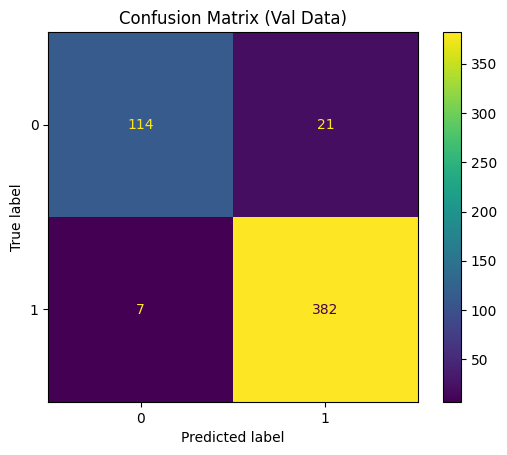

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_prediction(model, data, sample=1000):
    loader = torch.utils.data.DataLoader(data, batch_size=sample, shuffle=True)
    for X, t in loader:
        z = model(X.view(-1, 784))
        y = torch.sigmoid(z)
        break
    y = y.detach().numpy()
    t = t.detach().numpy()
    return y, t

y, t = get_prediction(model, val_data)
y = y > 0.5
cm = confusion_matrix(t, y)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot()
plt.title("Confusion Matrix (Val Data)")

**Task**: The code below trains a MLPModel for a very few number
of iterations. You should see that this model achieves a 74% accuracy.
Display the confusion matrix for this model by running the code below.

Training Accuracy: 0.7421410365335599
Validation Accuracy: 0.7423664122137404


Text(0.5, 1.0, 'Confusion Matrix (Val Data)')

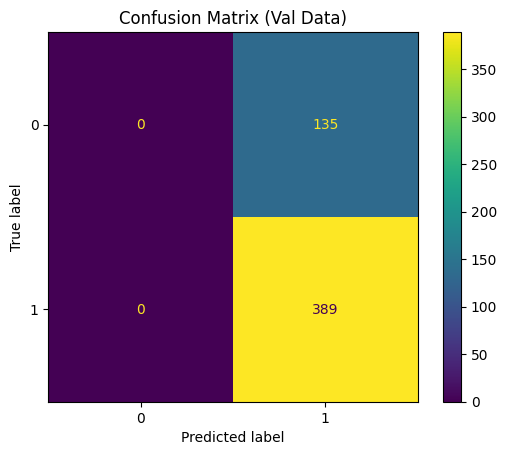

In [ ]:
m_once = MLPModel()
train_model(m_once, train_data, val_data, learning_rate=0.5, batch_size=500, \
            num_epochs=1, plot=False)
print("Training Accuracy:", accuracy(m_once, train_data))
print("Validation Accuracy:", accuracy(m_once, val_data))

y, t = get_prediction(m_once, val_data)
y = y > 0.5
ConfusionMatrixDisplay(confusion_matrix(t, y), display_labels=["0", "1"]).plot()
plt.title("Confusion Matrix (Val Data)")

**Graded Task**: What does the confusion matrix tell you about how
the `m_once` model is achieving 74% accuracy?

In [ ]:
# By classifying all the images as positive, the model achieves 74% accuracy as
# approximately 75% of the data set is positive.

We have been choosing a threshold of 0.5 for turning our continuous predicted
probabilities into a discrete prediction. However, this can be an
arbitrary choice.

**Task**: Note that we looked at the sign of the logits at the beginning of the notebook, and are now using a threshold of 0.5. Think about what relationship these two values (0 and 0.5) have. How do you obtain one from the other?

In [ ]:
# The sigmoid activation is an increasing function that is odd around 0.5, so it
# takes 0 to 0.5, while preserving the inequalities of the logits with 0 after
# applying it to both sides.

**Task**: Explain why, in practical application, it may be reasonable to use a different
threshold value. In what situation might you want the threshold to be set
very high in order to make a positive prediction? What about a negative prediction?

In [ ]:
# A high threshold decreases the chance of predicting positive, so it only makes
# positive predictions for high confidence estimates. This is expected to
# increase the model's precision, but because the total number of predictions
# decrease, the fraction of predicted TP's from all positives gets smaller, so
# recall decreases. This is useful if not predicting positive is low risk, but
# accuracy in predicting positive is essential.

# The same is true for low thresholds and negative prediction, if not predicting
# negative is low risk (for example, a positive diagnosis of a dangerous disease
# if not treated properly, but with relatively harmless treatment is low risk if
# wrong, since it is better to be safe than sorry), but it is essential to be
# accurate when you do predict negative.

A **receiver operating characteristic curve** (or ROC) shows how the True Positive Rate and False Positive Rate vary based on our choice of the decision making threshold used to binarize predictions.  By default, this threshold is 0.5, but it can be changed to any value between 0 and 1. Different thresholds will result in different TP and FP rates, all of which are illustrated on our graph. we can calculate the area underneath this curve in order to get a sense as to how our classifiers might work across a wide range of different thresholds. This calcution of area can also be used as a metric of our model's "goodness", and it is called AUC (or "Area Under Curve").

The AUC metric is particularly useful for machine learning practitioners
because it does *not* depend on the choice of the threshold value used
for making discrete predicions. The metric is also resistant to
measurement.

**Task**: Is it better for the AUC to be larger or smaller? Explain why.

In [ ]:
# The ROC is a curve from the bottom left to the top right of the unit square in
# TP-FP space, so its integral measures the area inside the square under its
# curve. This area is maximized when this curve is exactly just the left
# to upper boundary of the square, since then the area of the curve covers the
# whole square. In this case, since the top left corner represents TP=1 and FP=0
# we wish to get the curve as close to it as possible, which is achieved by the
# maximal curve since the boundary contains the top left corner. Hence, a larger
# AUC is better as that implies the ROC is closer to the top left corner and
# hence has a threshold choice with overall better TP-FP ratio.

The code below plots the ROC curve for a model.

Text(0.5, 1.0, 'Training ROC Curve')

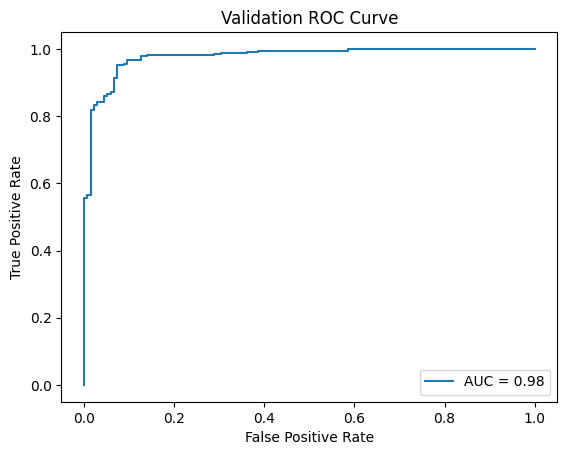

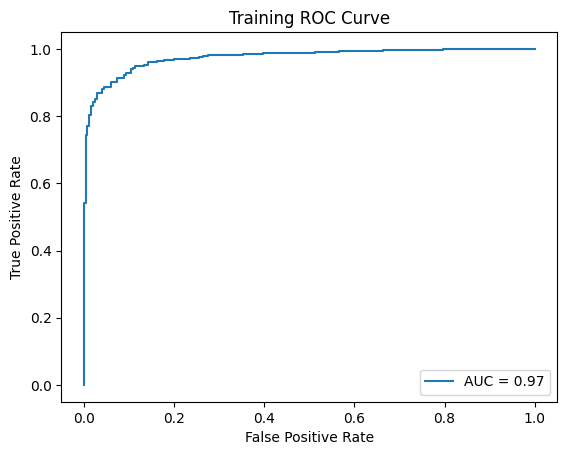

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

y, t = get_prediction(model, val_data)

fpr, tpr, thresholds = roc_curve(t, y)
roc_auc = auc(fpr, tpr)
rocp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
rocp.plot()
plt.title("Validation ROC Curve")


y, t = get_prediction(model, train_data)

fpr, tpr, thresholds = roc_curve(t, y)
roc_auc = auc(fpr, tpr)
rocp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
rocp.plot()
plt.title("Training ROC Curve")

Here is a function you can use to estimate the auc:

In [ ]:
def get_auc(model, data):
    y, t = get_prediction(model, data)
    fpr, tpr, thresholds = roc_curve(t, y)
    return auc(fpr, tpr)

## Part 4. Hyperparameter Tuning via Grid Search

As we mentioned in lab 1, hyperparameter choices matter significantly,
and these hyperparameter choices interact with one another.
Practitioners use a strategy called **grid search** to try
all variations of hyperparameters from a set of hyperparameters.

One very important hyperparameter is the number of hidden units in our MLPModel.
This setting affects the number of parameters (weights/biases) used in our model.

The use of ReLU vs sigmoid activation function is another hyperparameter that we
will explore.

Finally, optimization parameters like the batch size and the learning rate can
also significantly affect the learning process.

In [ ]:
class MLPModelSigmoid(nn.Module):
    """A three-layer MLP model for binary classification"""
    def __init__(self, input_dim=28*28, num_hidden=100):
        super(MLPModelSigmoid, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.fc3 = nn.Linear(num_hidden, 1)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.sig(out)
        out = self.fc2(out)
        out = self.sig(out)
        out = self.fc3(out)
        return out

**Graded Task**: Complete the code below, which performs grid search over the following hyperparameter
values of the:

- hidden size
- activation function (ReLu vs sigmoid activation)
- batch size
- learning rate

Do so by creating a new model and train it with the appropriate
settings, then assessing the final training/validation accuracy,
precision, recall, and AUC score. You may use to use
the flag `plot=False` when calling `train_model`. You might
also set `plot_every` to a large value and visualize the
training curve as a separate step for hyperparameter values
that you're interested in.

Please include all your output in your submission.

(There is one more graded task below that you can complete while the
hyperparameter tuning is running.)

In [ ]:
gridsearch = {}
for num_hidden in [25, 100, 250]:
    for act in ["relu", "sigmoid"]:
        for bs in [10, 100, 500]:
            for lr in [0.01, 0.1]:
                # Adjust num_epoch based on the batch size, so that we
                # train for the same number of iterations irrespective
                # of batch size
                ne = int(20 * (bs/100))

                modelname = f"num_hidden: {num_hidden}, activation: {act}, batch_size: {bs}, learning_rate: {lr}"
                print(f"========={modelname}")

                if act == 'relu':
                  m = MLPModel(num_hidden = num_hidden)
                else:
                  m = MLPModelSigmoid(num_hidden = num_hidden)
                train_model(m, train_data, val_data, learning_rate=lr,\
                            batch_size = bs, num_epochs = ne, plot = False)

                # Update and display metrics. This part is done for you.
                metrics = {
                    "acc_train": accuracy(m, train_data),
                    "acc_val": accuracy(m, val_data),
                    "precision_train": precision(m, train_data),
                    "precision_val": precision(m, val_data),
                    "recall_train": recall(m, train_data),
                    "recall_val": recall(m, val_data),
                    "auc_train": get_auc(m, train_data),
                    "auc_val": get_auc(m, val_data),
                }
                gridsearch[modelname] = metrics
                print(f'Accuracy (train):{metrics["acc_train"]} (val):{metrics["acc_val"]}')
                print(f'Precision (train):{metrics["precision_train"]} (val):{metrics["precision_val"]}')
                print(f'Recall (train):{metrics["recall_train"]} (val):{metrics["recall_val"]}')
                print(f'AUC (train):{metrics["auc_train"]} (val):{metrics["auc_val"]}')

=========num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.01
50 Loss: 0.6668807864189148 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
100 Loss: 0.6187258958816528 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
150 Loss: 0.6954129934310913 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
200 Loss: 0.30254220962524414 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
250 Loss: 0.603258490562439 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
300 Loss: 0.67039954662323 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
350 Loss: 0.7724162936210632 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
400 Loss: 0.3228874206542969 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
450 Loss: 0.36843928694725037 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
500 Loss: 0.5126477479934692 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
550 Loss: 0.5327476263046265 Train Acc: 0.76486830926

Please include the below output in your submission

In [ ]:
print(gridsearch)

# The output given by the gridsearch:
# {'num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.9150382327952421, 'acc_val': 0.9198473282442748, 'precision_train': 0.9271120927664274, 'precision_val': 0.9326683291770573, 'recall_train': 0.9610761305094447, 'recall_val': 0.961439588688946, 'auc_train': 0.9678658499108808, 'auc_val': 0.9670760735028087}, 'num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.9248088360237893, 'acc_val': 0.933206106870229, 'precision_train': 0.9703415218693828, 'precision_val': 0.9758064516129032, 'recall_train': 0.9270177447052089, 'recall_val': 0.9331619537275064, 'auc_train': 0.9794378616974, 'auc_val': 0.9781205369894316}, 'num_hidden: 25, activation: relu, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.9158878504672897, 'acc_val': 0.9198473282442748, 'precision_train': 0.9243835616438356, 'precision_val': 0.9262899262899262, 'recall_train': 0.9656554092730395, 'recall_val': 0.9691516709511568, 'auc_train': 0.9803055789178581, 'auc_val': 0.9695896410549367}, 'num_hidden: 25, activation: relu, batch_size: 100, learning_rate: 0.1': {'acc_train': 0.9356414613423959, 'acc_val': 0.9293893129770993, 'precision_train': 0.9821698398307646, 'precision_val': 0.9782608695652174, 'recall_train': 0.9301659988551803, 'recall_val': 0.9254498714652957, 'auc_train': 0.9765907314166381, 'auc_val': 0.9836618109111682}, 'num_hidden: 25, activation: relu, batch_size: 500, learning_rate: 0.01': {'acc_train': 0.909303313508921, 'acc_val': 0.9122137404580153, 'precision_train': 0.9110158134548378, 'precision_val': 0.9132530120481928, 'recall_train': 0.9728105323411562, 'recall_val': 0.974293059125964, 'auc_train': 0.9722706913436634, 'auc_val': 0.9696658097686376}, 'num_hidden: 25, activation: relu, batch_size: 500, learning_rate: 0.1': {'acc_train': 0.929269328802039, 'acc_val': 0.9408396946564885, 'precision_train': 0.9224806201550387, 'precision_val': 0.9344660194174758, 'recall_train': 0.9876931883228391, 'recall_val': 0.9897172236503856, 'auc_train': 0.9799307443124698, 'auc_val': 0.9834523469484909}, 'num_hidden: 25, activation: sigmoid, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8202642415923129, 'auc_val': 0.7690755022374559}, 'num_hidden: 25, activation: sigmoid, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.8999575191163977, 'acc_val': 0.898854961832061, 'precision_train': 0.971606864274571, 'precision_val': 0.9719101123595506, 'recall_train': 0.8912421293646251, 'recall_val': 0.8894601542416453, 'auc_train': 0.9649674690793975, 'auc_val': 0.9685232790631247}, 'num_hidden: 25, activation: sigmoid, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8343884659674133, 'auc_val': 0.8197276968485194}, 'num_hidden: 25, activation: sigmoid, batch_size: 100, learning_rate: 0.1': {'acc_train': 0.8519541206457094, 'acc_val': 0.851145038167939, 'precision_train': 0.8388660043615217, 'precision_val': 0.8402625820568927, 'recall_train': 0.9908414424728106, 'recall_val': 0.987146529562982, 'auc_train': 0.9668349386581183, 'auc_val': 0.9646577168428068}, 'num_hidden: 25, activation: sigmoid, batch_size: 500, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.7552752351097178, 'auc_val': 0.7146243930305627}, 'num_hidden: 25, activation: sigmoid, batch_size: 500, learning_rate: 0.1': {'acc_train': 0.7754885301614274, 'acc_val': 0.7805343511450382, 'precision_train': 0.767861068366674, 'precision_val': 0.7718253968253969, 'recall_train': 0.9997137950772753, 'recall_val': 1.0, 'auc_train': 0.9609787455899251, 'auc_val': 0.9591164429210702}, 'num_hidden: 100, activation: relu, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.852803738317757, 'acc_val': 0.8549618320610687, 'precision_train': 0.8382033325283748, 'precision_val': 0.8394793926247288, 'recall_train': 0.9934172867773325, 'recall_val': 0.9948586118251928, 'auc_train': 0.972200187682433, 'auc_val': 0.9642007045606017}, 'num_hidden: 100, activation: relu, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.8587510620220901, 'acc_val': 0.833969465648855, 'precision_train': 0.993717277486911, 'precision_val': 0.9934640522875817, 'recall_train': 0.8148254149971379, 'recall_val': 0.781491002570694, 'auc_train': 0.9811600585141654, 'auc_val': 0.9803484718651814}, 'num_hidden: 100, activation: relu, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.9284197111299916, 'acc_val': 0.9389312977099237, 'precision_train': 0.9526813880126183, 'precision_val': 0.9612403100775194, 'recall_train': 0.9507727532913566, 'recall_val': 0.9562982005141388, 'auc_train': 0.978877338877339, 'auc_val': 0.9745215652670666}, 'num_hidden: 100, activation: relu, batch_size: 100, learning_rate: 0.1': {'acc_train': 0.9161002548853017, 'acc_val': 0.9007633587786259, 'precision_train': 0.9895734597156398, 'precision_val': 0.9884057971014493, 'recall_train': 0.8963938179736691, 'recall_val': 0.8766066838046273, 'auc_train': 0.980522973168663, 'auc_val': 0.9852232695420357}, 'num_hidden: 100, activation: relu, batch_size: 500, learning_rate: 0.01': {'acc_train': 0.925446049277825, 'acc_val': 0.9370229007633588, 'precision_train': 0.9491283223778222, 'precision_val': 0.9587628865979382, 'recall_train': 0.9504865483686319, 'recall_val': 0.9562982005141388, 'auc_train': 0.9702524364007822, 'auc_val': 0.9722936303913168}, 'num_hidden: 100, activation: relu, batch_size: 500, learning_rate: 0.1': {'acc_train': 0.9492353440951572, 'acc_val': 0.9599236641221374, 'precision_train': 0.9598756710935292, 'precision_val': 0.9742268041237113, 'recall_train': 0.972238122495707, 'recall_val': 0.9717223650385605, 'auc_train': 0.9879676810006826, 'auc_val': 0.9852613538988859}, 'num_hidden: 100, activation: sigmoid, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8571783841558592, 'auc_val': 0.8560696943730364}, 'num_hidden: 100, activation: sigmoid, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.8281648258283772, 'acc_val': 0.8301526717557252, 'precision_train': 0.814476458186929, 'precision_val': 0.8164556962025317, 'recall_train': 0.9951345163136806, 'recall_val': 0.9948586118251928, 'auc_train': 0.9510270088843006, 'auc_val': 0.9572122250785491}, 'num_hidden: 100, activation: sigmoid, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8790982839480425, 'auc_val': 0.8531276778063411}, 'num_hidden: 100, activation: sigmoid, batch_size: 100, learning_rate: 0.1': {'acc_train': 0.8587510620220901, 'acc_val': 0.8587786259541985, 'precision_train': 0.8462668298653611, 'precision_val': 0.847682119205298, 'recall_train': 0.9894104178591872, 'recall_val': 0.987146529562982, 'auc_train': 0.9643574194341439, 'auc_val': 0.959002189850519}, 'num_hidden: 100, activation: sigmoid, batch_size: 500, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8792105840138182, 'auc_val': 0.8656383890317052}, 'num_hidden: 100, activation: sigmoid, batch_size: 500, learning_rate: 0.1': {'acc_train': 0.8842395921835174, 'acc_val': 0.8835877862595419, 'precision_train': 0.8791463101054255, 'precision_val': 0.8761467889908257, 'recall_train': 0.9785346307956497, 'recall_val': 0.9820051413881749, 'auc_train': 0.9630118890356671, 'auc_val': 0.9605065219461106}, 'num_hidden: 250, activation: relu, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.91928632115548, 'acc_val': 0.9312977099236641, 'precision_train': 0.9356463346390599, 'precision_val': 0.9514066496163683, 'recall_train': 0.9570692615912993, 'recall_val': 0.9562982005141388, 'auc_train': 0.9679589388486478, 'auc_val': 0.9709225935447015}, 'num_hidden: 250, activation: relu, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.7209005947323704, 'acc_val': 0.6870229007633588, 'precision_train': 0.9995417048579285, 'precision_val': 1.0, 'recall_train': 0.6242129364625072, 'recall_val': 0.5784061696658098, 'auc_train': 0.9765830862977601, 'auc_val': 0.9790726459106922}, 'num_hidden: 250, activation: relu, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.9231096006796942, 'acc_val': 0.933206106870229, 'precision_train': 0.944633730834753, 'precision_val': 0.9561855670103093, 'recall_train': 0.95220377790498, 'recall_val': 0.9537275064267352, 'auc_train': 0.9788190542059306, 'auc_val': 0.9723697991050176}, 'num_hidden: 250, activation: relu, batch_size: 100, learning_rate: 0.1': {'acc_train': 0.9424384027187765, 'acc_val': 0.9522900763358778, 'precision_train': 0.9699620880723243, 'precision_val': 0.9739583333333334, 'recall_train': 0.9519175729822553, 'recall_val': 0.961439588688946, 'auc_train': 0.9842789566157589, 'auc_val': 0.9842902027992002}, 'num_hidden: 250, activation: relu, batch_size: 500, learning_rate: 0.01': {'acc_train': 0.9248088360237893, 'acc_val': 0.9389312977099237, 'precision_train': 0.937813720022309, 'precision_val': 0.9518987341772152, 'recall_train': 0.9625071551230682, 'recall_val': 0.9665809768637532, 'auc_train': 0.9818826437678896, 'auc_val': 0.9738550890221841}, 'num_hidden: 250, activation: relu, batch_size: 500, learning_rate: 0.1': {'acc_train': 0.949447748513169, 'acc_val': 0.9561068702290076, 'precision_train': 0.9570466030320045, 'precision_val': 0.9668367346938775, 'recall_train': 0.975672581568403, 'recall_val': 0.974293059125964, 'auc_train': 0.9830468152009765, 'auc_val': 0.9851851851851852}, 'num_hidden: 250, activation: sigmoid, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8708566167918075, 'auc_val': 0.8801961344377796}, 'num_hidden: 250, activation: sigmoid, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.8903993203058623, 'acc_val': 0.8950381679389313, 'precision_train': 0.9460754943079689, 'precision_val': 0.9538043478260869, 'recall_train': 0.9038351459645106, 'recall_val': 0.9023136246786633, 'auc_train': 0.9554275691313857, 'auc_val': 0.9512329810530324}, 'num_hidden: 250, activation: sigmoid, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.8594506666666667, 'auc_val': 0.863153384747215}, 'num_hidden: 250, activation: sigmoid, batch_size: 100, learning_rate: 0.1': {'acc_train': 0.8819031435853866, 'acc_val': 0.8797709923664122, 'precision_train': 0.8734112862226742, 'precision_val': 0.8704545454545455, 'recall_train': 0.9834001144819691, 'recall_val': 0.9845758354755784, 'auc_train': 0.9704500040779708, 'auc_val': 0.9631914691040656}, 'num_hidden: 250, activation: sigmoid, batch_size: 500, learning_rate: 0.01': {'acc_train': 0.7421410365335599, 'acc_val': 0.7423664122137404, 'precision_train': 0.7421410365335599, 'precision_val': 0.7423664122137404, 'recall_train': 1.0, 'recall_val': 1.0, 'auc_train': 0.9004820335359885, 'auc_val': 0.8598114824335904}, 'num_hidden: 250, activation: sigmoid, batch_size: 500, learning_rate: 0.1': {'acc_train': 0.913338997451147, 'acc_val': 0.9293893129770993, 'precision_train': 0.9570497630331753, 'precision_val': 0.9680851063829787, 'recall_train': 0.9247281053234115, 'recall_val': 0.9357326478149101, 'auc_train': 0.9597610233159919, 'auc_val': 0.9707131295820242}}

{'num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.9150382327952421, 'acc_val': 0.9198473282442748, 'precision_train': 0.9271120927664274, 'precision_val': 0.9326683291770573, 'recall_train': 0.9610761305094447, 'recall_val': 0.961439588688946, 'auc_train': 0.9678658499108808, 'auc_val': 0.9670760735028087}, 'num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.9248088360237893, 'acc_val': 0.933206106870229, 'precision_train': 0.9703415218693828, 'precision_val': 0.9758064516129032, 'recall_train': 0.9270177447052089, 'recall_val': 0.9331619537275064, 'auc_train': 0.9794378616974, 'auc_val': 0.9781205369894316}, 'num_hidden: 25, activation: relu, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.9158878504672897, 'acc_val': 0.9198473282442748, 'precision_train': 0.9243835616438356, 'precision_val': 0.9262899262899262, 'recall_train': 0.9656554092730395, 'recall_val': 0.9691516709511568, 'auc_train': 0.9803055

**Task**: Which hyperparameter choice is the "best"? You should base this answer on the
validation AUC. Use the other metrics as a guide to understand the kinds of predictions and mistakes
that your model is likely make.
Train a final model with those hyperparameter values.

In [ ]:
best = None
maxAUC = 0
for modelname in gridsearch:
  AUC = gridsearch[modelname]['auc_val']
  if AUC > maxAUC:
    best = modelname
    maxAUC = AUC
print('Best Model=', best, '\ncurrentAUC=', maxAUC)

# The best hyperparameter choice is with 100 hidden units, a relu activation,
# a batch size of 500, and a learning rate of 0.1.
# The AUC of this choice is 0.985 from the grid search. We retrain below:
bestm = MLPModel(num_hidden = 100)
train_model(bestm, train_data, val_data, learning_rate=0.1,\
            batch_size = 500, num_epochs = int(20 * (500/100)), plot = False)
print("Training Accuracy:", accuracy(bestm, train_data))
print("Validation Accuracy:", accuracy(bestm, val_data))

Best Model= num_hidden: 100, activation: relu, batch_size: 500, learning_rate: 0.1 
currentAUC= 0.9852613538988859
50 Loss: 0.43314024806022644 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
100 Loss: 0.4609310030937195 Train Acc: 0.887213254035684 Val Acc: 0.8854961832061069
150 Loss: 0.3708529770374298 Train Acc: 0.7720900594732371 Val Acc: 0.7709923664122137
200 Loss: 0.2461583912372589 Train Acc: 0.9184367034834324 Val Acc: 0.9274809160305344
250 Loss: 0.16230490803718567 Train Acc: 0.9063296516567545 Val Acc: 0.898854961832061
300 Loss: 0.2814006805419922 Train Acc: 0.8697960917587085 Val Acc: 0.8683206106870229
350 Loss: 0.21162238717079163 Train Acc: 0.9095157179269329 Val Acc: 0.9045801526717557
400 Loss: 0.16633862257003784 Train Acc: 0.9301189464740867 Val Acc: 0.9465648854961832
450 Loss: 0.1824183464050293 Train Acc: 0.9358538657604079 Val Acc: 0.950381679389313
500 Loss: 0.1658906191587448 Train Acc: 0.9290569243840272 Val Acc: 0.9312977099236641
550 Loss: 0.133

**Task**: Report the test accuracy and AUC for this model, and plot the confusion matrix over the test set.

True AUC= 0.9161626123164583 Test Accuracy= 0.8525641025641025


Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

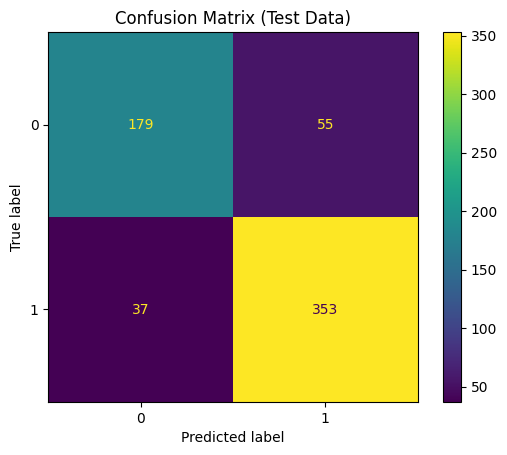

In [ ]:
trueAUC = get_auc(bestm, test_data)
testacc = accuracy(bestm, test_data)
print('True AUC=', trueAUC, 'Test Accuracy=', testacc)
y, t = get_prediction(bestm, test_data)
y = y > 0.5
ConfusionMatrixDisplay(confusion_matrix(t, y), display_labels=["0", "1"]).plot()
plt.title("Confusion Matrix (Test Data)")

# The test accuracy of the model is 0.853 and the AUC is 0.916 after retraining.
# The plot of the confusion matrix is given as a matrix as below:
# 179   55
# 37    353

**Graded Task**: Explain why a model with high AUC may still
produce consistently poor predictions for a subset of the population.
You might find this article interesting: [Gender imbalance in medical imaging datasets produces biased classifiers for computer-aided diagnosis](https://www.pnas.org/doi/10.1073/pnas.1919012117); in particular,
Figure 1 shows how test AUC differs male/female patients depending on the training set used.

In [ ]:
# Without good representative data, a high AUC just implies that TP-FP ratio can
# be made high on that specific subset of the data that you trained on. This
# means that the model is very good at classifying that subsection of data, but
# it may not be able to do so with more diverse data since it may contain a
# bunch of new characteristics or variables that it has not yet encountered and
# separated into the classes before, so its decision boundaries may be skewed
# to only really properly classify one set. For example, a data set where gender
# significantly changes characteristics that the model predicts could make
# AUC a weak metric if the data is only primarily composed of one gender, if we
# are predicting its capacities on the rest of the set. That is, it may be good
# for that one gender, but it may not be as good for the others since it does
# not account for the additional factors they may present.